# Jump Analytics

Now that each jump has an attached confidence value towards its identification, recognizing the actual hang time and distance would also be valuable.

Using the python architecture now & the Dec 30, 2023 data since only 2 runs registered (easy):

In [9]:
import matplotlib.pyplot as plt
from load import load_2023_12_30, load_2024_01_01
from signal_processing import lowpass, length, idxsUnderTH, mean, std
from sync import splitTileIntoDownhillTracks, syncTile
from plotting import plotTileRuns, plotJumpAnalysis

In [10]:
a50_2023_12_30, a50_all_2023_12_30, f6p_2023_12_30, tile_2023_12_30 = load_2023_12_30()
a50_2024_01_01, a50_all_2024_01_01, f6p_2024_01_01, tile_2024_01_01 = load_2024_01_01()

In [11]:
tile_2023_12_30_sync = syncTile(
    tile=tile_2023_12_30,
    truth=a50_all_2023_12_30,
    printOutput=True,
    # use_mae=False,
    time_step_s=0.5,
    max_time_search_s=30,
    alt_step=0.25,
    min_alt_start=130,
    max_alt_search=140)
tile_2024_01_01_sync = syncTile(
    tile=tile_2024_01_01,
    truth=a50_all_2024_01_01,
    printOutput=True,
    # use_mae=False,
    time_step_s=0.5,
    max_time_search_s=30,
    alt_step=0.25,
    min_alt_start=0,
    max_alt_search=20)

In [ ]:
def printAllJumpAnalytics(runs):
    for i, run in enumerate(runs):
        print("Run", i + 1, "jump count:", len(run.jumps))
        for j, jump in enumerate(run.jumps):
            print("\tJump", j + 1, "\tConfidence:", jump.confidence, \
                "%\n\t\tAir time:", jump.airTime, "s\n\t\tDistance:", jump.distance, "m")

In [ ]:
tile_2023_12_30_runs = splitTileIntoDownhillTracks(tile_2023_12_30_sync, a50_2023_12_30)
plotTileRuns(tile_2023_12_30_runs)
printAllJumpAnalytics(tile_2023_12_30_runs)

93400 104900
167800 179200
185200 189200
Run 1 jump count: 3
	Jump 1 	Confidence: 92.3076923076923 %
		Air time: 0.56 s
		Distance: 5.989117449264272 m
	Jump 2 	Confidence: 61.53846153846154 %
		Air time: 0.11 s
		Distance: 0.5672518229105847 m
	Jump 3 	Confidence: 100.0 %
		Air time: 0.85 s
		Distance: 7.0575301876945575 m
Run 2 jump count: 1
	Jump 1 	Confidence: 61.53846153846154 %
		Air time: 0.29 s
		Distance: 2.5196978750313845 m
Run 3 jump count: 0


Trying on some more data!

In [ ]:
tile_2024_01_01_runs = splitTileIntoDownhillTracks(tile_2024_01_01_sync, a50_2024_01_01)
plotTileRuns(tile_2024_01_01_runs)
printAllJumpAnalytics(tile_2024_01_01_runs)

70100 74400
80700 85000
103600 114100
155200 166100
196200 200400
248300 270300
331700 348800
399800 409500
447000 455700
490000 499600
535700 544700
583200 592900
638800 647500
685200 691400
728700 741000
771200 781800
864000 879600
962400 978000
1018600 1026000
1078900 1090500
1105800 1107900
1147900 1154500
1191600 1204000
Run 1 jump count: 0
Run 2 jump count: 0
Run 3 jump count: 0
Run 4 jump count: 1
	Jump 1 	Confidence: 92.3076923076923 %
		Air time: 0.26 s
		Distance: 2.2610568704907443 m
Run 5 jump count: 0
Run 6 jump count: 0
Run 7 jump count: 3
	Jump 1 	Confidence: 92.3076923076923 %
		Air time: 0.97 s
		Distance: 9.539943078195108 m
	Jump 2 	Confidence: 76.92307692307693 %
		Air time: 0.08 s
		Distance: 0.27714295659613813 m
	Jump 3 	Confidence: 61.53846153846154 %
		Air time: 0.37 s
		Distance: 2.382642001224107 m
Run 8 jump count: 2
	Jump 1 	Confidence: 69.23076923076923 %
		Air time: 0.06 s
		Distance: 0.3590258269998067 m
	Jump 2 	Confidence: 92.3076923076923 %
		Air time

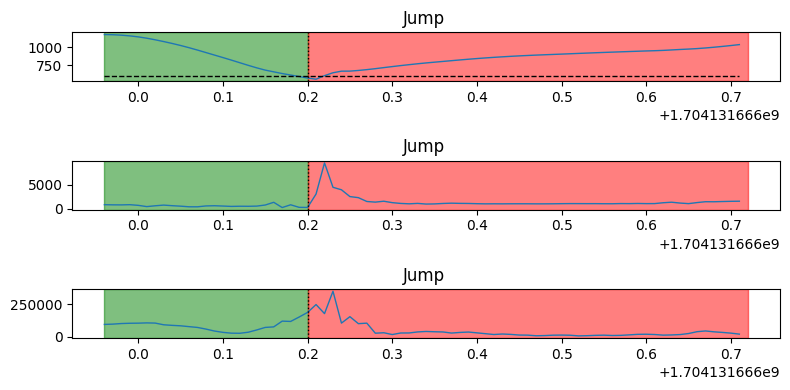

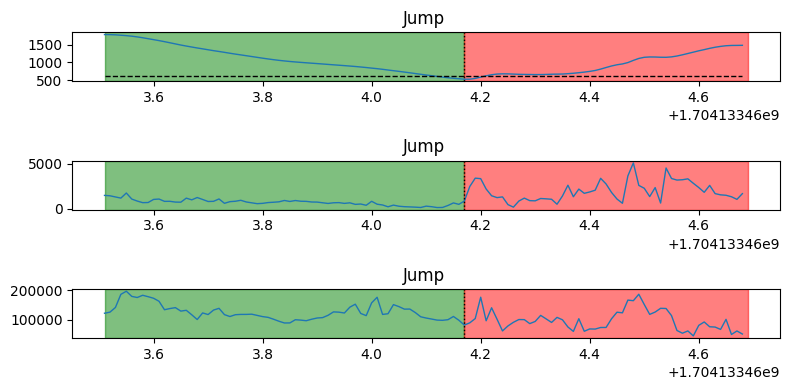

In [ ]:
_ = plotJumpAnalysis(tile_2024_01_01_runs[3], 0)
_ = plotJumpAnalysis(tile_2024_01_01_runs[6], 0)